In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
play_store = pd.read_csv('googleplaystore (1).csv')

In [3]:
play_store.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
play_store.shape

(10841, 13)

In [5]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
mean_rating = play_store[['Rating']].mean()
mean_rating

Rating    4.193338
dtype: float64

In [8]:
play_store['Rating'].fillna(mean_rating, inplace = True)

In [9]:
play_store.dropna(subset = ['Price', 'Content Rating','Current Ver', 'Android Ver','Type' ], inplace=True)

In [10]:
play_store.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [11]:
play_store.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10829,9648,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10829,33,FAMILY,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9360.0,NaN,NaN,NaN,4.191838,0.515263,1.0,4.0,4.3,4.5,5.0
Reviews,10829,5999,0,594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10829,457,Varies with device,1694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10829,20,"1,000,000+",1578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10829,2,Free,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10829,92,0,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10829,6,Everyone,8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10829,119,Tools,840,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Converting the duration to an interger
#play_store['Rating'] = play_store['Rating'].astype(int)
play_store['Reviews'] = play_store['Reviews'].astype(int)

In [13]:
#strip the value at the back of size for us to be able to change it to int
play_store['Size'].value_counts()

Varies with device    1694
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

In [14]:
play_store["Size"] = play_store["Size"].str.replace("M","")
play_store["Size"] = play_store["Size"].str.replace("k","")
play_store["Size"] = play_store["Size"].str.replace("Varies with device",'0')

In [15]:
play_store[['Size']] = play_store[['Size']].apply(pd.to_numeric)

In [16]:
play_store['Installs']
play_store['Installs'] = play_store['Installs'].str.strip('+' ',')
play_store['Installs'] = play_store['Installs'].str.replace(',','')

In [17]:
play_store['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10829, dtype: object

In [18]:
play_store['Installs'] =play_store['Installs'].astype(int)

In [19]:
play_store['Price'] = play_store['Price'].str.strip('$')

In [20]:
play_store['Price'] = play_store['Price'].str.replace('.', '')

C:\Users\User\AppData\Local\Temp\ipykernel_1224\3823426451.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store['Price'] = play_store['Price'].str.replace('.', '')


In [21]:
display(play_store.dtypes)

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [22]:
play_store['Price'] =play_store['Price'].astype(float)
play_store['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10829, dtype: float64

In [23]:
play_store['Price'].value_counts()

0.0       10032
99.0        146
299.0       129
199.0        73
499.0        72
          ...  
1990.0        1
175.0         1
1400.0        1
485.0         1
104.0         1
Name: Price, Length: 92, dtype: int64

In [24]:
## We round the value 4.76 to 4.00
play_store['Price'].round()

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10829, dtype: float64

In [25]:
## We conver from float to Integer
play_store['Price'] =play_store['Price'].astype(int)

In [26]:
display(play_store.dtypes)

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price               int32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
play_store.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10829,10829,9360.000000,1.082900e+04,10829.000000,1.082900e+04,10829,10829.000000,10829,10829,10829,10829,10829
unique,9648,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1376,2831,33
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1968,NaN,NaN,NaN,NaN,10032,NaN,8704,840,326,1458,2451
mean,NaN,NaN,4.191838,4.446018e+05,31.167735,1.547990e+07,NaN,102.809124,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.515263,2.929213e+06,91.612036,8.507114e+07,NaN,1595.777787,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,3.100000,5.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,2.100000e+03,10.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,5.481500e+04,28.000000,5.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [28]:
category = pd.DataFrame(play_store['Category']).value_counts().head(5)
category

Category
FAMILY      1968
GAME        1144
TOOLS        841
MEDICAL      463
BUSINESS     460
dtype: int64

In [29]:
play_store = play_store.drop_duplicates()

In [30]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          8886 non-null   float64
 3   Reviews         10346 non-null  int32  
 4   Size            10346 non-null  float64
 5   Installs        10346 non-null  int32  
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  int32  
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(2), int32(3), object(8)
memory usage: 1010.4+ KB


<AxesSubplot:xlabel='Category'>

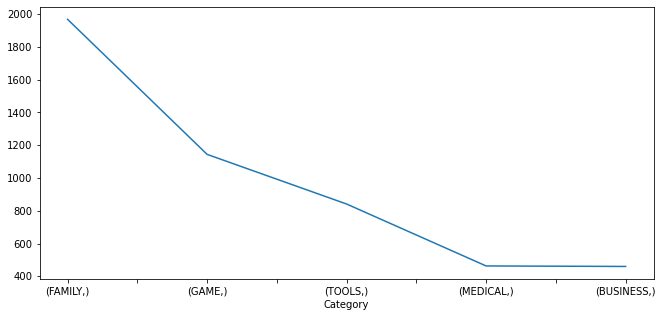

In [31]:
plt.figure(figsize=(11, 5))
category.plot()

In [32]:
play_store['Rating'].value_counts()

4.4    1031
4.3    1016
4.5     976
4.2     887
4.6     768
4.1     656
4.0     538
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [33]:
play_store[['Rating','Category']].value_counts()

Rating  Category           
4.3     FAMILY                 199
4.5     FAMILY                 181
4.4     FAMILY                 181
4.5     GAME                   169
4.4     GAME                   162
                              ... 
2.9     MEDICAL                  1
        MAPS_AND_NAVIGATION      1
        FOOD_AND_DRINK           1
        EVENTS                   1
1.0     BUSINESS                 1
Length: 768, dtype: int64

In [34]:
App_rating = pd.DataFrame(play_store[['Category','Rating']])
App_rating.head()


,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

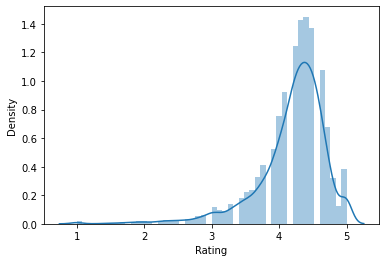

In [35]:
#Distribution of app ratings
sns.distplot(play_store["Rating"])

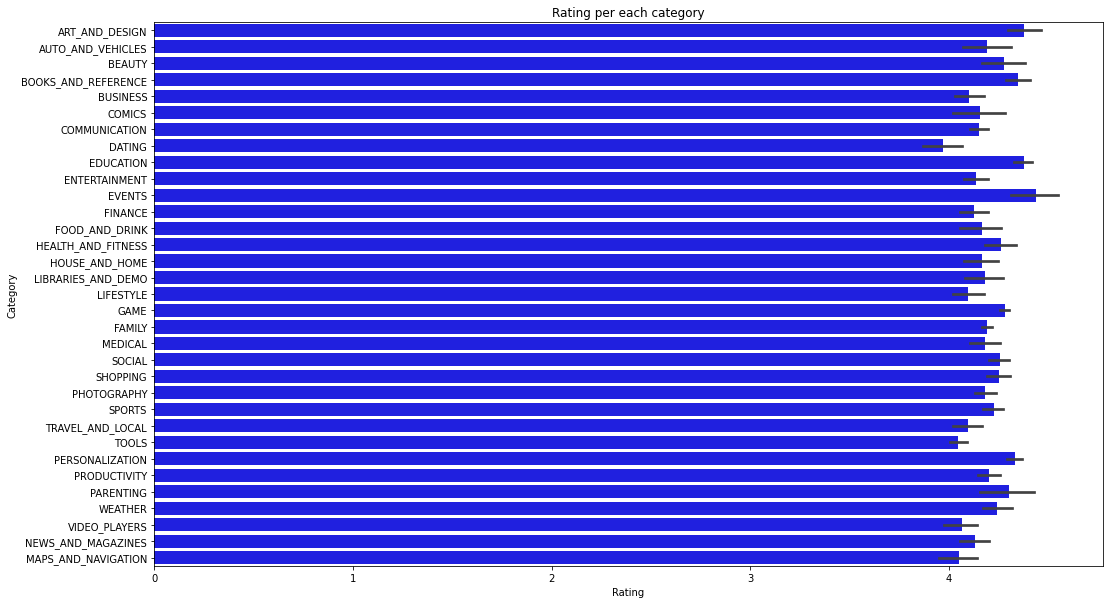

In [36]:
# Visualising the top rating by category
plt.figure(figsize=(17, 10))
sns.barplot(y='Category', x= 'Rating', data= App_rating, color='blue')
plt.title('Rating per each category');

In [37]:
play_store[['Size', 'Price',]].value_counts()
size_price = pd.DataFrame(play_store[['Size', 'Price']].value_counts())
size_price

0
Size   Price      
0.0    0      1451
13.0   0       180
11.0   0       176
12.0   0       175
14.0   0       167
...            ...
       2899      1
       3999      1
15.0   99        1
       199       1
1020.0 104       1

[966 rows x 1 columns]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


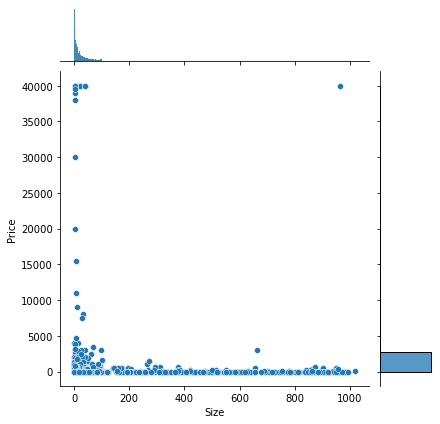

In [38]:
sns.jointplot(play_store["Size"],play_store["Price"])

In [39]:
play_store[['Category', 'Price']].value_counts()
cate_pri = pd.DataFrame(play_store[['App', 'Price']].value_counts()).tail(10)
cate_pri

,,0
App,Price,
Digital Clock AW-7,0,1
Digital Falak,0,1
Dino T-Rex,0,1
Digital TV,0,1
Digital Tourist BH Itinerary,0,1
Digoo·Cloud,0,1
Diligan CD VR,0,1
Dine In CT - Food Delivery,0,1
Dino Defends king 3 – Dinosaur T rex Hunter Games,0,1


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1800x1800 with 0 Axes>

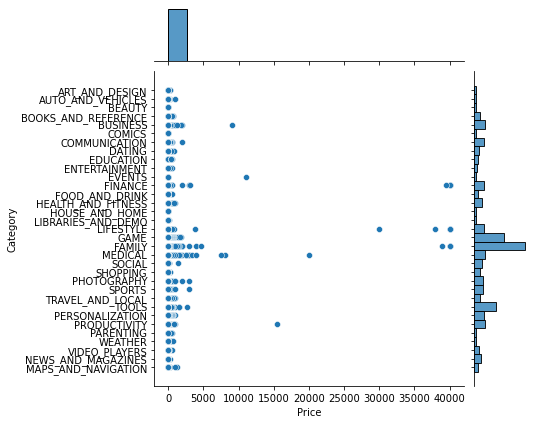

In [40]:
plt.figure(figsize=(25, 25))
sns.jointplot(play_store["Price"],play_store["Category"])

In [41]:
play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [42]:
play_store['Type'].value_counts()

Free    9584
Paid     762
Name: Type, dtype: int64

In [43]:
free_paid = pd.DataFrame(play_store[['Type']]).value_counts()
free_paid

Type
Free    9584
Paid     762
dtype: int64

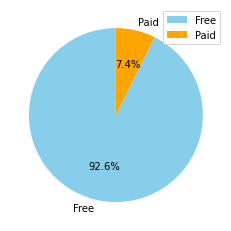

In [44]:
plt.pie(play_store['Type'].value_counts(), 
        labels=play_store['Type'].value_counts().index,
        colors=['skyblue', 'orange'], startangle=90, autopct='%1.1f%%'
        
       )
plt.legend();

In [45]:
play_store.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10346, dtype: bool

In [47]:
play_store['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64